# Function estimation with Keras/Tensorflow
This function shows how keras and Tensorflow can be used to estimate the parameters of 
a given function, learning them from data. We must define the equation of the function,
setting the parameters to be learned from data as Tensorflow variables.
Then, an optimizer (such as Gradient Descent) is used to learn the parameters.
The only requirement is that the function must be differentiable, because Tensorflow will 
compute the derivatives automatically in order to minimize the loss using Gradient Descent.

## Imports

In [2]:
import numpy as np
import tensorflow as tf
from random import random
from keras.src.optimizers import SGD, Adam
from utils import plot_function, plot_functions

## Function
We create data for x and y. x ranges from -10 to 10.
The function to be learned follows the equation: `y = a*(x**3) + b*(x**2) + c*x + d`
`a`, `b`, `c` and `d` are parameters to be learned from data.

In [3]:
x = np.arange(-10, 11)
# y is the function to learn from data
a, b, c, d = 0.1, -0.2, 0.3, -0.4
y = a*(x**3) + b*(x**2) + c*x + d

We add some noise to the target variable `y` in the dataset to make prediction more difficult.

In [4]:
noise = np.random.normal(0,0.01, len(x))
y = y + noise

## Visualization
Let's plot the y function:

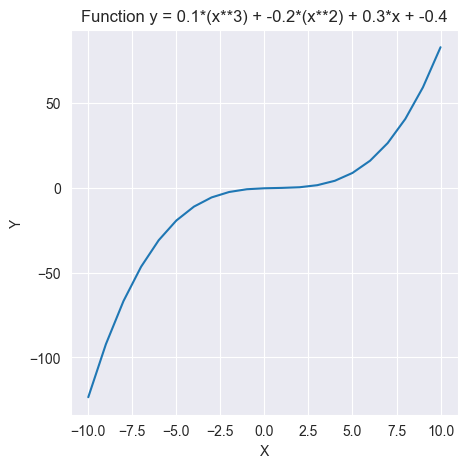

In [5]:
plot_function(x, y, f"Function y = {a}*(x**3) + {b}*(x**2) + {c}*x + {d}")

## Tensorflow Variables
We now create the four variables to be learned as Tensorflow variables. 

In [6]:
A, B, C, D = tf.Variable(random()), tf.Variable(random()), tf.Variable(random()), tf.Variable(random())

## Loss function
We use MSE to compute the loss function (it is regression problem).

In [7]:
loss_mse = lambda: sum((y - (A * (x ** 3) + B * (x ** 2) + C * x + D)) ** 2) / (2*len(x))

## Optimizer
We use the Adam optimizer, which is much faster than SGD.
Adam (Adaptive Moment Estimation) is a stochastic gradient descent method that is based on adaptive momentum.
It is widely used in training deep neural networks. 

In [8]:
optimizer = Adam(learning_rate=1)

## Training
We now ask the optimizer to minimize the loss by applying the optimization algorith to the
variables, learning their values from data. 

In [9]:
for epoch in range(300):
    optimizer.minimize(loss_mse, var_list=[A, B, C, D])
    print("Epoch: {:3d}, loss: {:.10f}, A:{:.4f}, B: {:.4f}, C:{:.4f}, D:{:.4f}.".format(
        epoch, loss_mse().numpy(), A.numpy(), B.numpy(), C.numpy(), D.numpy()))

Epoch:   0, loss: 21061.7148437500, A:-0.3636, B: -0.2054, C:-0.4191, D:-0.4928.
Epoch:   1, loss: 22873.9648437500, A:-0.3773, B: -0.8704, C:-0.4316, D:-1.1571.
Epoch:   2, loss: 2326.9160156250, A:-0.0273, B: -0.9381, C:-0.0806, D:-1.2233.
Epoch:   3, loss: 5878.4697265625, A:0.3437, B: -0.6800, C:0.2917, D:-0.9638.
Epoch:   4, loss: 15206.3242187500, A:0.4997, B: -0.2970, C:0.4491, D:-0.5796.
Epoch:   5, loss: 9281.0859375000, A:0.4116, B: 0.0668, C:0.3624, D:-0.2144.
Epoch:   6, loss: 965.1318969727, A:0.1862, B: 0.2906, C:0.1385, D:0.0111.
Epoch:   7, loss: 2660.5495605469, A:-0.0518, B: 0.3255, C:-0.0979, D:0.0477.
Epoch:   8, loss: 8390.2724609375, A:-0.1880, B: 0.2017, C:-0.2325, D:-0.0744.
Epoch:   9, loss: 7496.8461914062, A:-0.1747, B: -0.0186, C:-0.2175, D:-0.2931.
Epoch:  10, loss: 2069.5524902344, A:-0.0431, B: -0.2654, C:-0.0842, D:-0.5382.
Epoch:  11, loss: 200.7236328125, A:0.1368, B: -0.4685, C:0.0974, D:-0.7396.
Epoch:  12, loss: 3356.4538574219, A:0.2844, B: -0.5752

## Evaluation
Let's see how far the parameters are from the actual function:

In [10]:
print(f"Original function: y = {a}*(x**3) + {b}*(x**2) + {c}*x + {d}.")
print("Function learned: y = {:.4f}*(x**3) + {:.4f}*(x**2) + {:.4f}*x + {:.4f}.".format(
    A.numpy(), B.numpy(), C.numpy(), D.numpy()))

Original function: y = 0.1*(x**3) + -0.2*(x**2) + 0.3*x + -0.4.
Function learned: y = 0.1000*(x**3) + -0.2000*(x**2) + 0.2994*x + -0.4016.


Not bad!
Let's visualize both functions to see whether there are important differences.

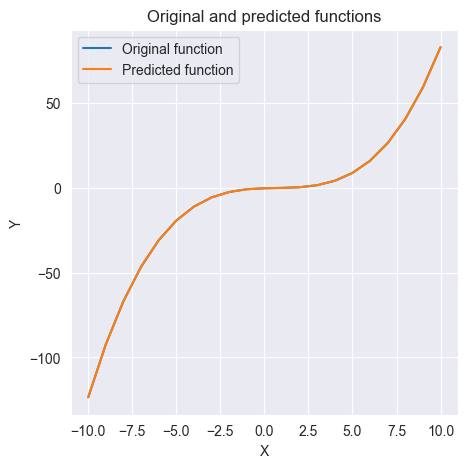

In [11]:
y_predicted = A.numpy()*(x**3) + B.numpy()*(x**2) + C.numpy()*x + D.numpy()
plot_functions(x, y, y_predicted, "Original and predicted functions")

## ✨ Questions ✨ 

1. What happens if you do not add noise to y? Why? Try it out.
2. What happens if you add more noise (e.g., noise = np.random.normal(0, 1, len(x))). Why? Try it out.

### Answers

1. The prediction could convert to perfect because data perfectly fits the function and the network
2. Parameters are not leaned that well because data do not hold the ground-truth information
 (there has been too much noise added). 